# Game Winner predict

## Domain Analsis

In [1]:
import numpy as np # for numerical operations
import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import warnings
warnings.filterwarnings("ignore") # to ignore warning messages

In [2]:
# Load datasets
df = pd.read_csv('pubg.csv')
pd.set_option("display.max_columns",None) # display all columns 

In [3]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [4]:
df.drop(columns=['Id','groupId','matchId'] , inplace=True)

In [5]:
df.head() # preview first 5 rows of the feature dataset

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [6]:
df.tail() # preview last 5 rows of the feature dataset

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0,2,268.00,0,0,1,18,0,2,1,78.25,1766,solo-fpp,98,94,1590,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 26 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int64  
 1   boosts           int64  
 2   damageDealt      float64
 3   DBNOs            int64  
 4   headshotKills    int64  
 5   heals            int64  
 6   killPlace        int64  
 7   killPoints       int64  
 8   kills            int64  
 9   killStreaks      int64  
 10  longestKill      float64
 11  matchDuration    int64  
 12  matchType        object 
 13  maxPlace         int64  
 14  numGroups        int64  
 15  rankPoints       int64  
 16  revives          int64  
 17  rideDistance     float64
 18  roadKills        int64  
 19  swimDistance     float64
 20  teamKills        int64  
 21  vehicleDestroys  int64  
 22  walkDistance     float64
 23  weaponsAcquired  int64  
 24  winPoints        int64  
 25  winPlacePerc     float64
dtypes: float64(6), int64(19), object(1)
memory

In [8]:
df.shape

(4446966, 26)

### Feature Descriptions - PUBG Match Dataset

**Id**: A unique identifier for each player in the dataset.

**groupId**: Identifies the team or group a player belongs to in a match.

**matchId**: A unique identifier for each game match.

**assists**: The number of times the player helped a teammate get a kill.

**boosts**: The number of boost items used, such as energy drinks or painkillers.

**damageDealt**: The total amount of damage the player inflicted on others.

**DBNOs**: The number of enemies the player knocked down (Down But Not Out).

**headshotKills**: The number of kills the player achieved with headshots.

**heals**: The number of healing items the player used.

**killPlace**: The player's ranking based on kills (lower value means more kills).

**killPoints**: Points awarded based on kills (part of an older ranking system).

**kills**: The total number of enemies the player killed.

**killStreaks**: The highest number of kills the player made in a short time.

**longestKill**: The distance (in meters) of the player's longest kill.

**matchDuration**: The duration of the match in seconds.

**matchType**: The type of game mode (e.g., solo, duo, squad, first-person, third-person).

**maxPlace**: The maximum number of placement positions possible in the match.

**numGroups**: The total number of teams/groups that participated in the match.

**rankPoints**: Ranking points based on performance (used if killPoints is -1).

**revives**: The number of times the player revived a teammate.

**rideDistance**: The total distance the player traveled in vehicles (in meters).

**roadKills**: The number of enemies killed by hitting them with a vehicle.

**swimDistance**: The total distance the player swam (in meters).

**teamKills**: The number of teammates the player accidentally or intentionally killed.

**vehicleDestroys**: The number of vehicles destroyed by the player.

**walkDistance**: The total distance the player walked or ran (in meters).

**weaponsAcquired**: The number of weapons the player picked up.

**winPoints**: Points awarded based on match wins (part of the newer ranking system).

**winPlacePerc**: The player's final placement in the match, represented as a percentage (1.0 is first place, 0.0 is last).


In [9]:
# Display basic statistical details of the dataset for each numerical feature,
# including count, mean, standard deviation, minimum, 25th percentile, median (50%), 
# 75th percentile, and maximum values. This helps understand the data distribution.

df.describe() 

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,2.299759e+01,1.579506e+03,4.450467e+01,4.300759e+01,8.920105e+02,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,5.097262e+01,2.587399e+02,2.382811e+01,2.328949e+01,7.366478e+02,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.132000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


### 📊 Dataset Summary: `df.describe()`

**Total Entries:** 4,446,966 rows  
**Columns Summary:**

---

#### 🔸 assists
- Mean: 0.23 | Std: 0.59
- Min: 0 | Max: 22
- 25%: 0 | 50%: 0 | 75%: 0

#### 🔸 boosts
- Mean: 1.10 | Std: 1.71
- Min: 0 | Max: 33
- 25%: 0 | 50%: 0 | 75%: 2

#### 🔸 damageDealt
- Mean: 130.72 | Std: 170.78
- Min: 0 | Max: 6616
- 25%: 0 | 50%: 84.24 | 75%: 186.0

#### 🔸 DBNOs (Down But Not Out)
- Mean: 0.66 | Std: 1.14
- Min: 0 | Max: 53
- 25%: 0 | 50%: 0 | 75%: 1

#### 🔸 headshotKills
- Mean: 0.23 | Std: 0.60
- Min: 0 | Max: 64
- 25%: 0 | 50%: 0 | 75%: 0

#### 🔸 heals
- Mean: 1.37 | Std: 2.68
- Min: 0 | Max: 80
- 25%: 0 | 50%: 0 | 75%: 2

#### 🔸 killPlace
- Mean: 47.6 | Std: 27.46
- Min: 1 | Max: 101
- 25%: 24 | 50%: 47 | 75%: 71

#### 🔸 killPoints
- Mean: 505.01 | Std: 627.5
- Min: 0 | Max: 2170
- 25%: 0 | 50%: 0 | 75%: 1172

#### 🔸 kills
- Mean: 0.92 | Std: 1.55
- Min: 0 | Max: 72
- 25%: 0 | 50%: 0 | 75%: 1

#### 🔸 killStreaks
- Mean: 0.54 | Std: 0.71
- Min: 0 | Max: 20
- 25%: 0 | 50%: 0 | 75%: 1

#### 🔸 longestKill
- Mean: 22.99m | Std: 50.97m
- Min: 0m | Max: 1094m

#### 🔸 matchDuration
- Mean: 1579s (~26 min) | Std: 258s
- Min: 9s | Max: 2237s

#### 🔸 maxPlace
- Mean: 44.5 | Min: 1 | Max: 100

#### 🔸 numGroups
- Mean: 43.0 | Min: 1 | Max: 100

#### 🔸 rankPoints
- Mean: 892.0 | Std: 736.6
- Min: -1 | Max: 5910

#### 🔸 revives
- Mean: 0.16 | Std: 0.47
- Max: 39

#### 🔸 rideDistance
- Mean: 606.1m | Std: 1498.3m
- Max: 40710m

#### 🔸 roadKills
- Mean: 0.003 | Max: 18

#### 🔸 swimDistance
- Mean: 4.5m | Max: 3823m

#### 🔸 teamKills
- Mean: 0.023 | Max: 12

#### 🔸 vehicleDestroys
- Mean: 0.0079 | Max: 5

#### 🔸 walkDistance
- Mean: 1154.2m | Max: 25780m

#### 🔸 weaponsAcquired
- Mean: 3.66 | Max: 236

#### 🔸 winPoints
- Mean: 606.5 | Std: 739.7
- Max: 2013

#### 🔸 winPlacePerc
- Mean: 0.472 | Std: 0.307
- Min: 0.0 | Max: 1.0


In [10]:
# Check for missing (null/NaN) values in each column of the DataFrame
# This helps identify data cleaning needs before performing analysis or modeling

df.isnull().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [11]:
# Display the data types of each column in the DataFrame
# Useful for understanding the structure of the dataset and identifying any necessary type conversions

df.dtypes

assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

# PUBG Match Dataset - Exploratory Data Analysis (EDA)
In this notebook, we perform an exploratory data analysis to understand the key factors affecting the player's winning percentage (`winPlacePerc`) and explore relationships among features.

# Univariate Analysis

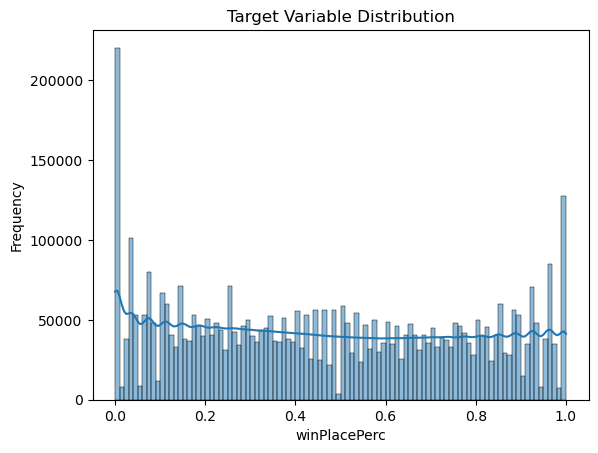

In [12]:
# Plotting the distribution of the target variable 'winPlacePerc'
sns.histplot(df['winPlacePerc'], bins=100, kde=True)  
# - df['winPlacePerc']: the target column from the dataframe
# - bins=100: divides the data into 100 intervals (for a detailed histogram)
# - kde=True: overlays a Kernel Density Estimate line to show the probability density
plt.title("Target Variable Distribution")  # Set the title of the plot
plt.xlabel("winPlacePerc")  # Label the x-axis
plt.ylabel("Frequency")     # Label the y-axis
plt.show()  # Display the plot


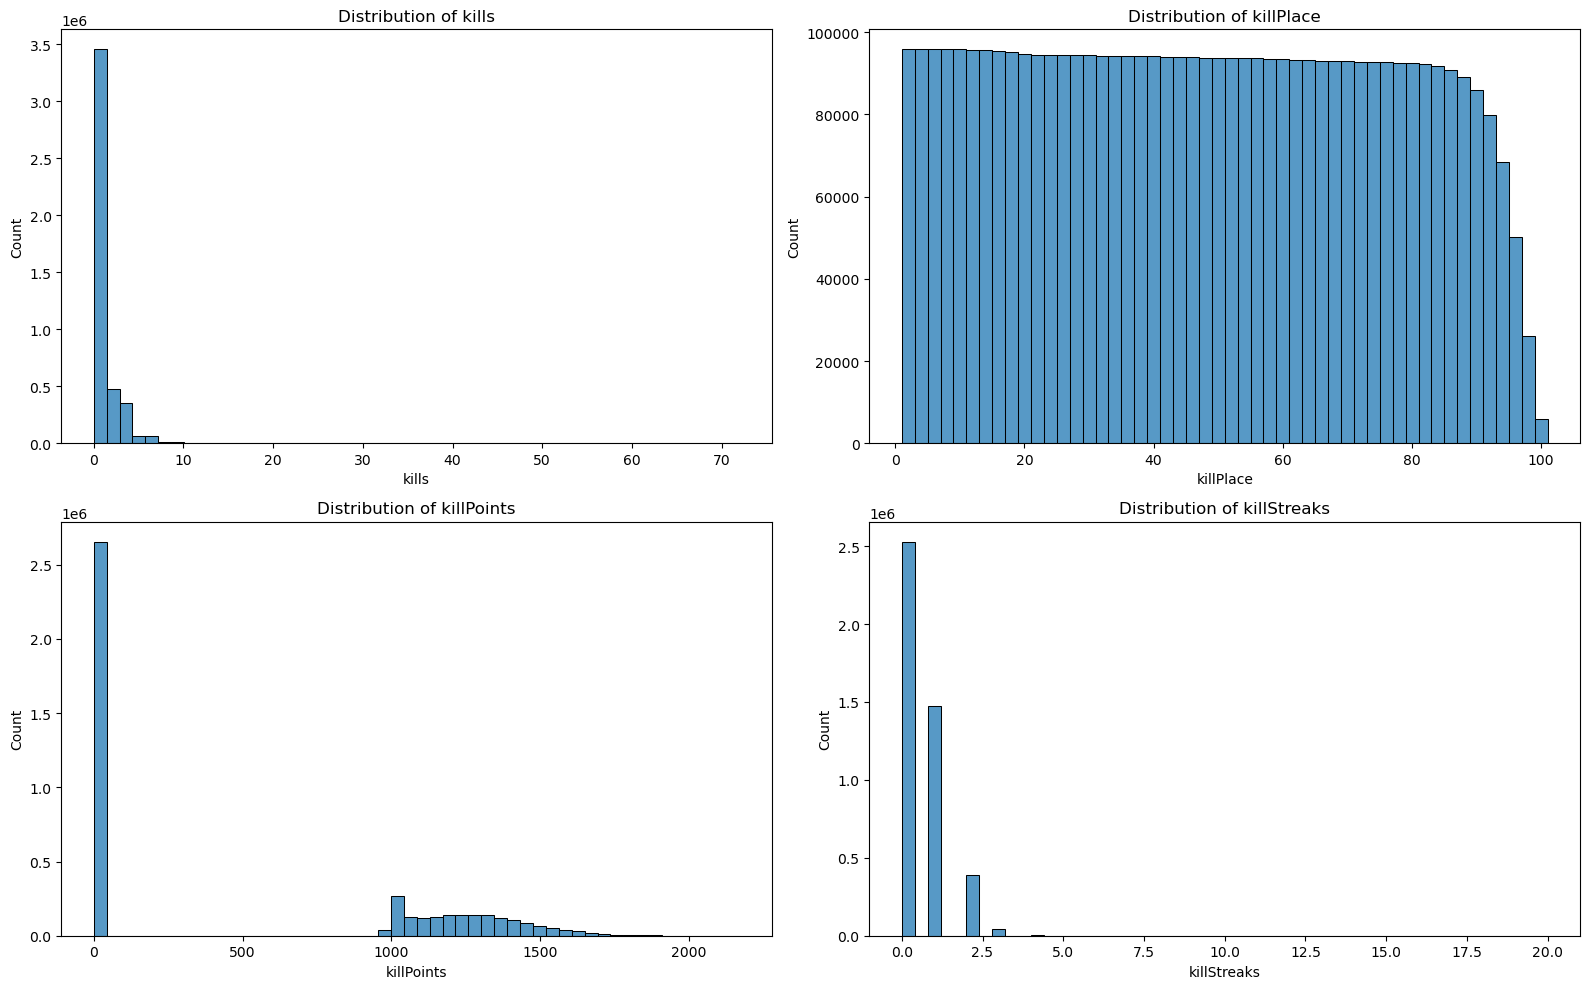

In [13]:
# Kill-related feature distributions
kill_features = ['kills', 'killPlace', 'killPoints', 'killStreaks']
plt.figure(figsize=(16, 10))
for i, col in enumerate(kill_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], bins=50, kde=False)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

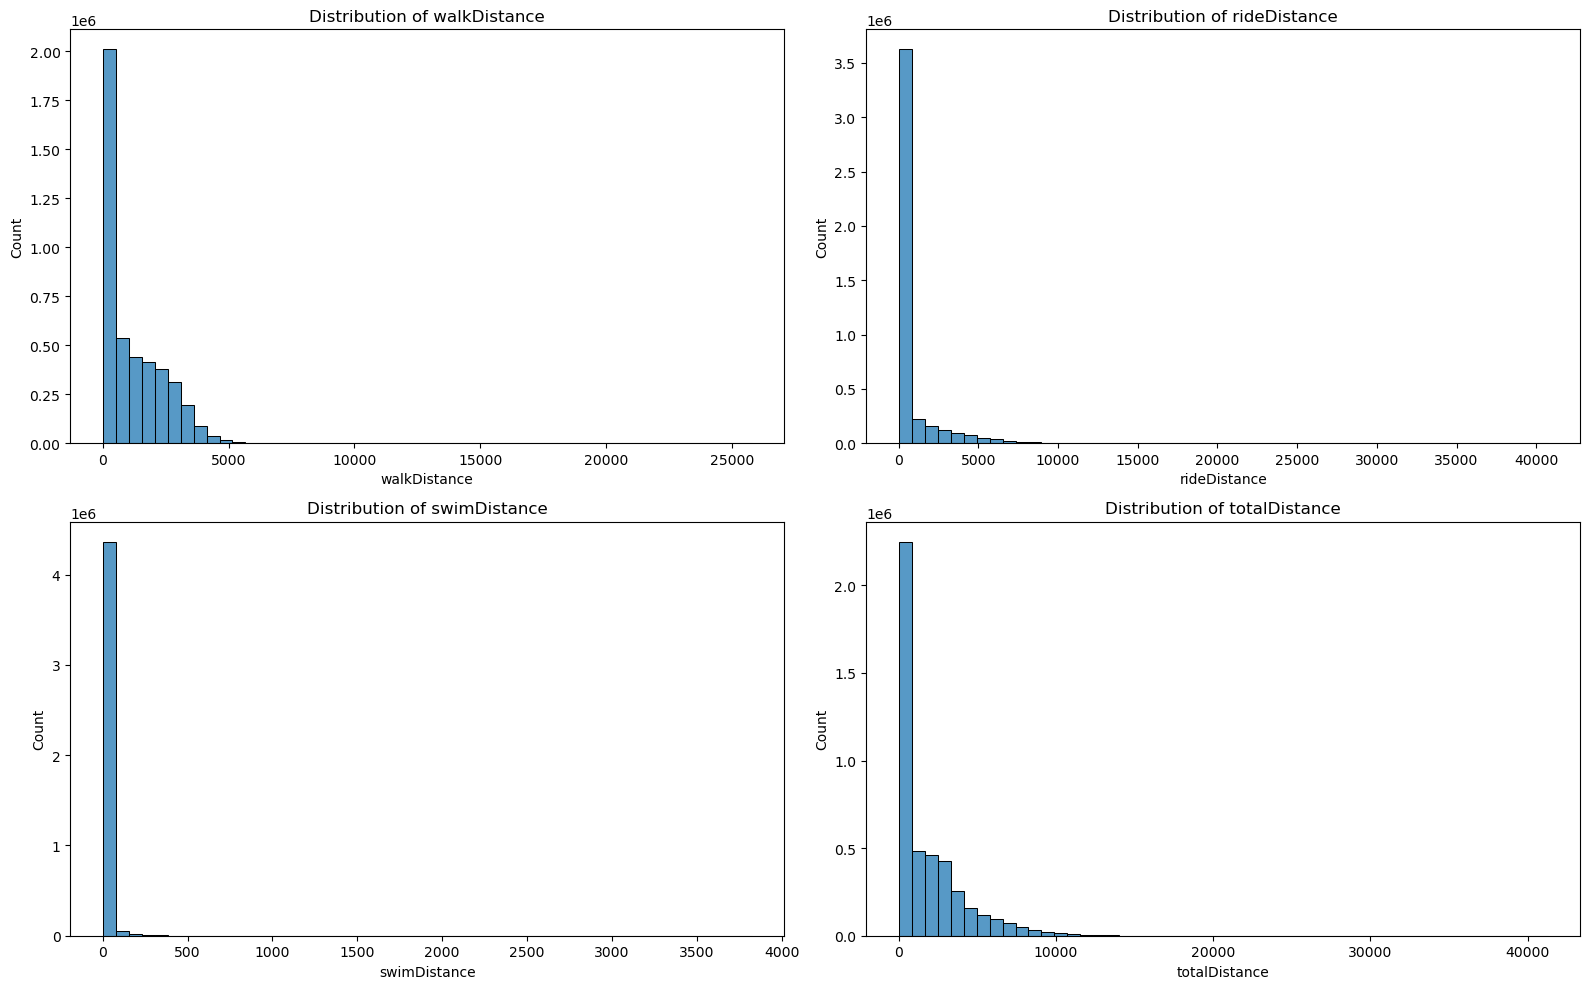

In [14]:
# Univariate Analysis for distance features
# Creating a new feature by summing walk, ride, and swim distances
df['totalDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']

distance_features = ['walkDistance', 'rideDistance', 'swimDistance', 'totalDistance']
plt.figure(figsize=(16, 10))
for i, col in enumerate(distance_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], bins=50, kde=False)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Bivariate Analysis

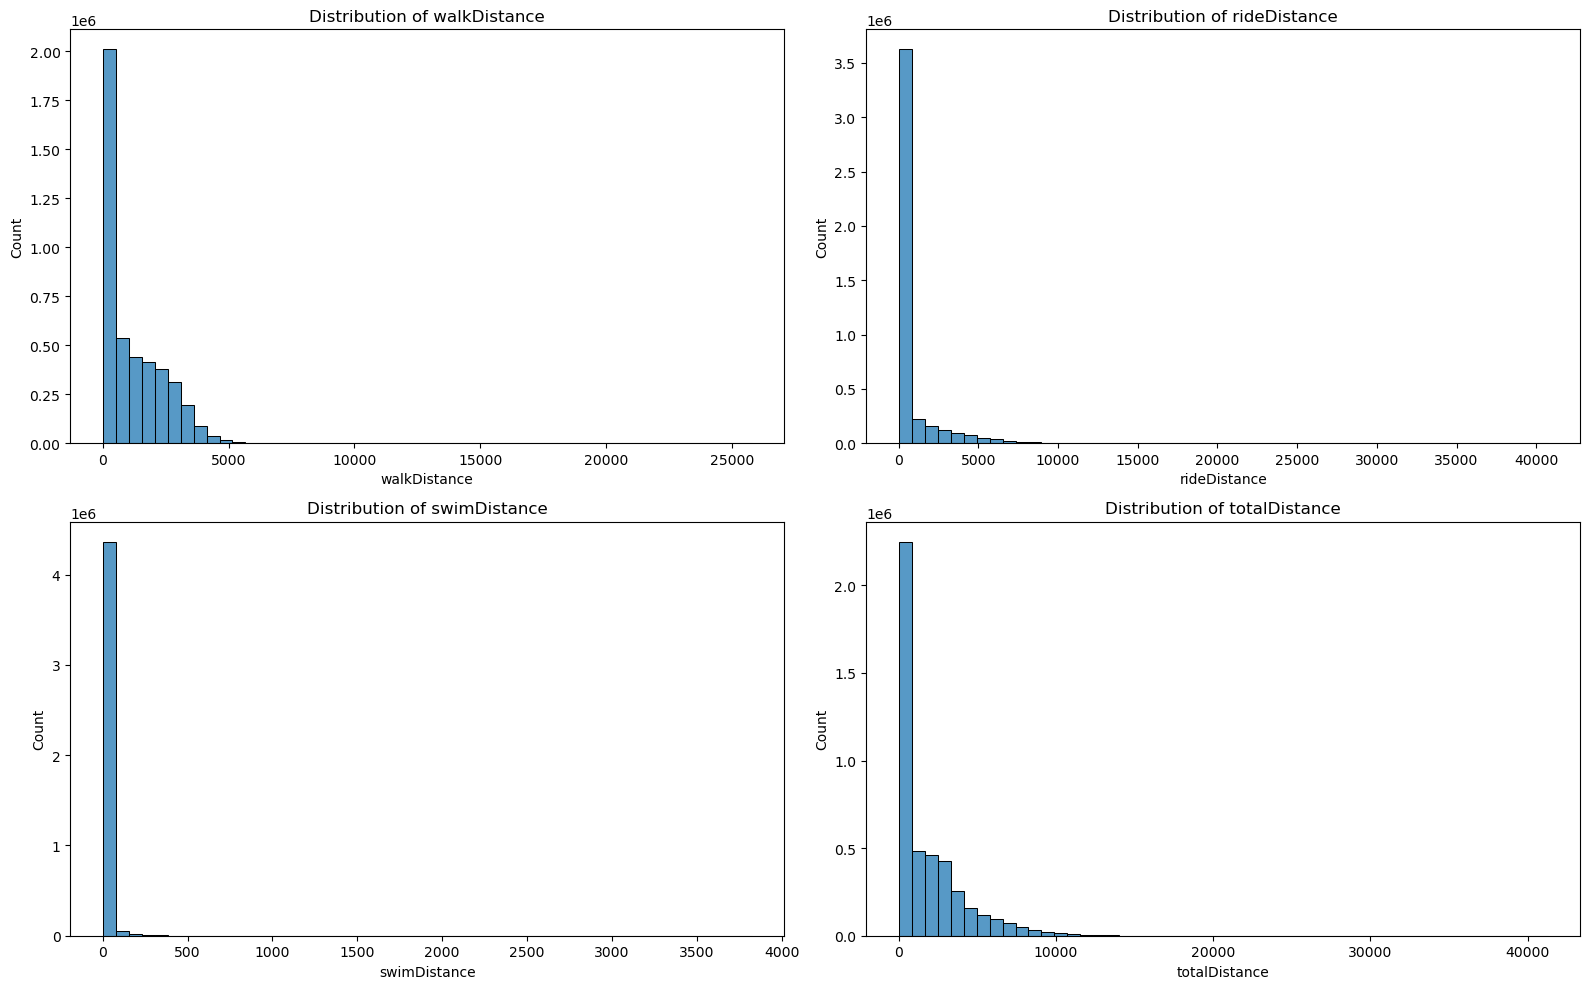

In [15]:
# Univariate Analysis for distance features
# Creating a new feature by summing walk, ride, and swim distances
df['totalDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']

distance_features = ['walkDistance', 'rideDistance', 'swimDistance', 'totalDistance']
plt.figure(figsize=(16, 10))
for i, col in enumerate(distance_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], bins=50, kde=False)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show() # plotting using matplotlib

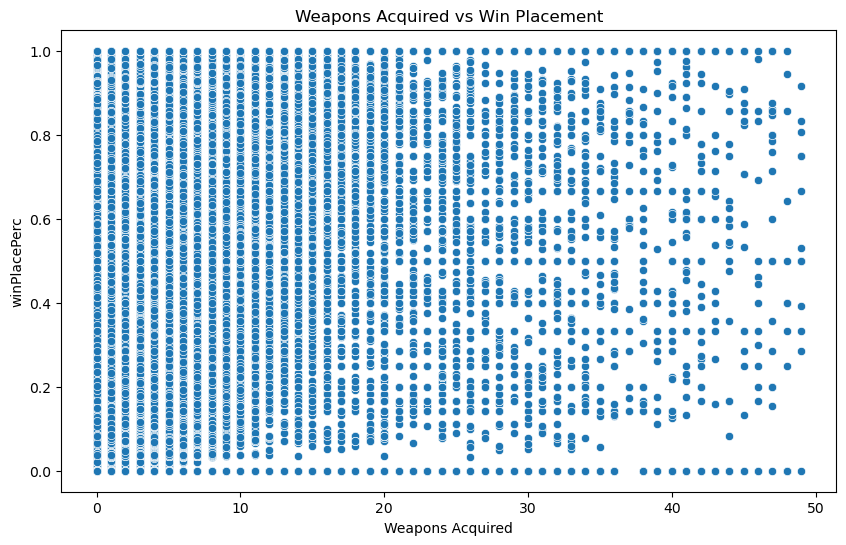

In [16]:
# Bivariate Analysis - weaponsAcquired vs winPlacePerc
# Shows how number of weapons picked affects win placement (limited to < 50 for clarity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weaponsAcquired', y='winPlacePerc', data=df[df['weaponsAcquired'] < 50])
plt.title("Weapons Acquired vs Win Placement")
plt.xlabel("Weapons Acquired")
plt.ylabel("winPlacePerc")
plt.show() # plotting using matplotlib

# Summary
- Features like walkDistance, kills, weaponsAcquired, and heals show strong positive correlations with winPlacePerc.
- Players who engage more (e.g., travel more, loot more, fight more) tend to have higher win placement.
- There are many zero values in features like revives, boosts, and swimDistance — these could be further investigated.
- Outliers exist and may need handling before modeling.


# Multivariate Analysis

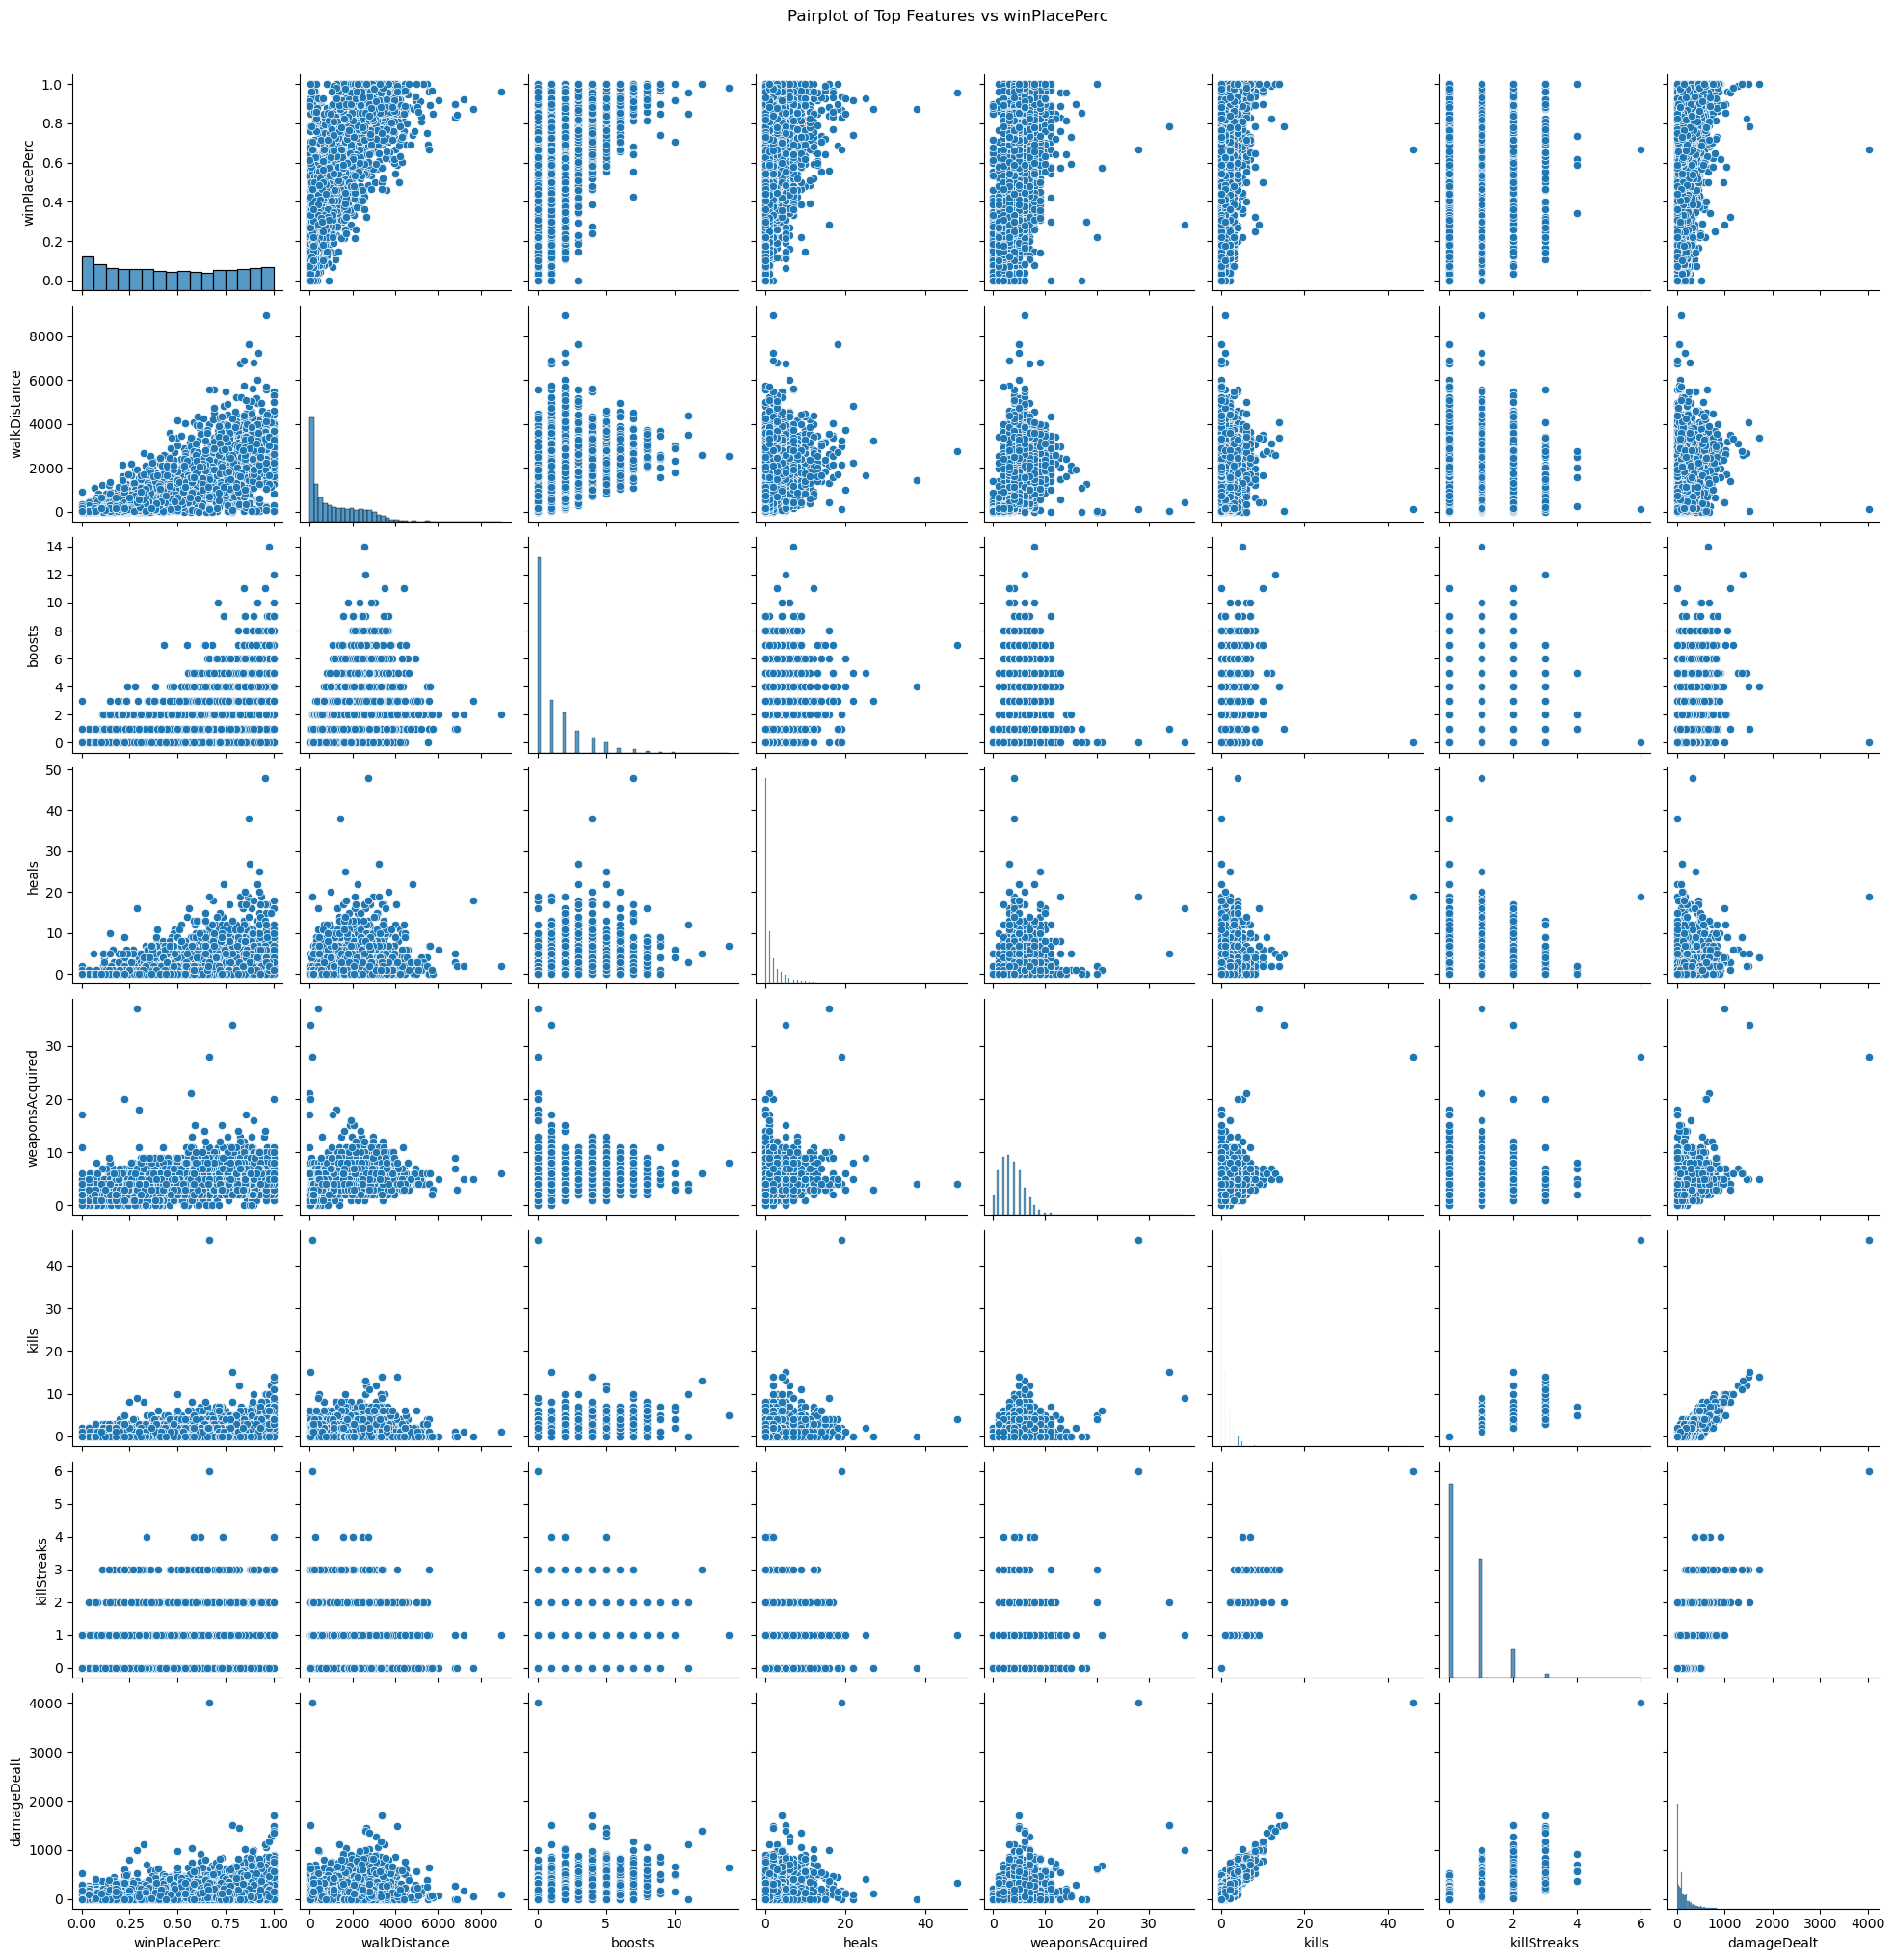

In [17]:
# Selecting top correlated features with winPlacePerc
top_features = df[['winPlacePerc', 'walkDistance', 'boosts', 'heals', 'weaponsAcquired', 'kills', 'killStreaks', 'damageDealt']]

# Sample 5000 rows for faster plotting
sampled_data = top_features.sample(n=5000, random_state=42)

# Pairplot to visualize relationships
sns.pairplot(sampled_data)
plt.suptitle("Pairplot of Top Features vs winPlacePerc", y=1.02)
plt.show() # plotting using matplotlib

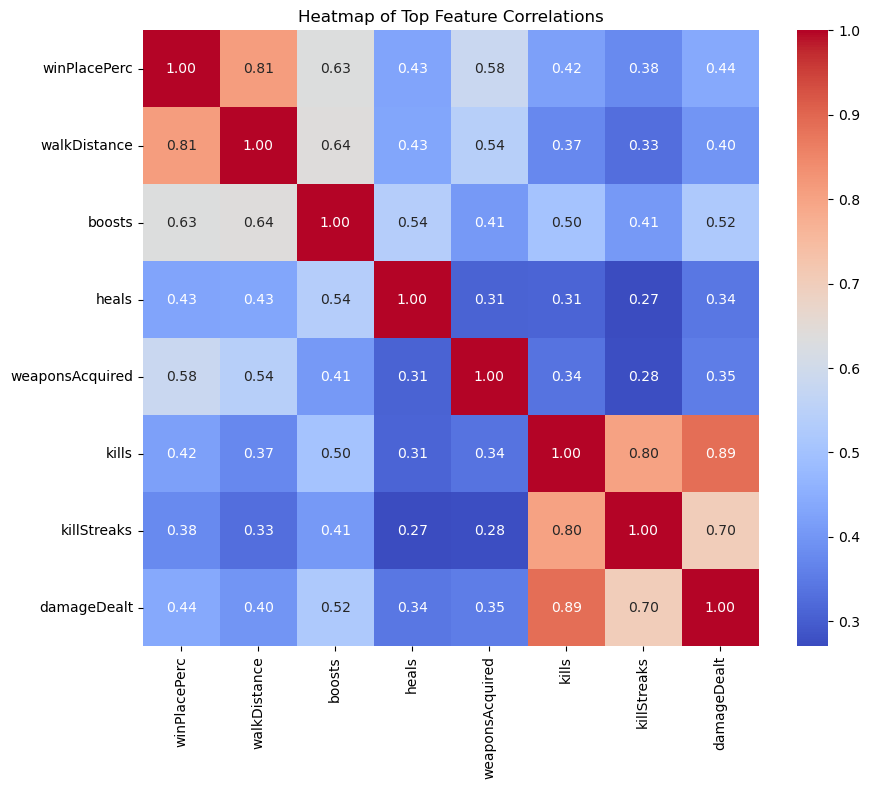

In [18]:
# Multivariate Analysis - correlation heatmap
# Shows relationships between multiple top features
plt.figure(figsize=(10, 8))
corr_matrix = top_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Heatmap of Top Feature Correlations")
plt.show() # plotting using matplotlib

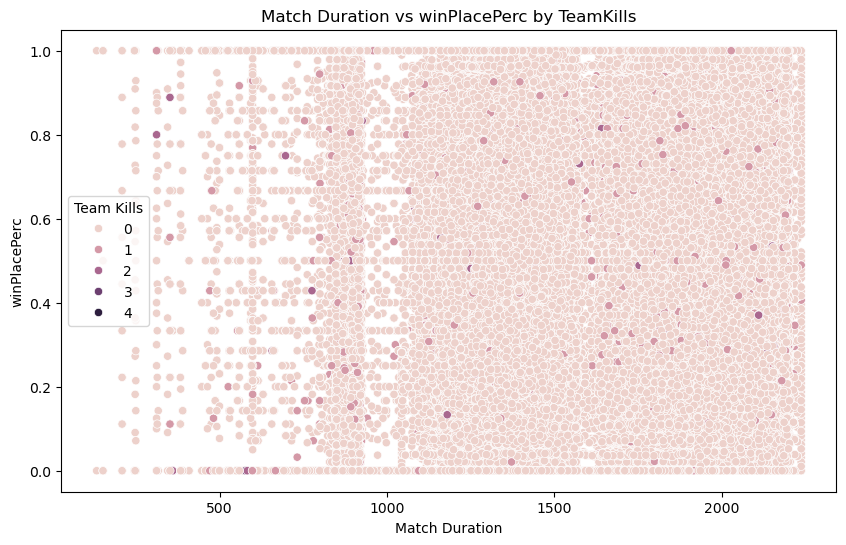

In [19]:
# Multivariate Analysis - scatter plot with hue
# Analyzing matchDuration and winPlacePerc by teamKills
plt.figure(figsize=(10, 6))
sns.scatterplot(x='matchDuration', y='winPlacePerc', hue='teamKills', data=df[df['teamKills'] < 5])
plt.title("Match Duration vs winPlacePerc by TeamKills")
plt.xlabel("Match Duration")
plt.ylabel("winPlacePerc")
plt.legend(title="Team Kills")
plt.show() # plotting using matplotlib

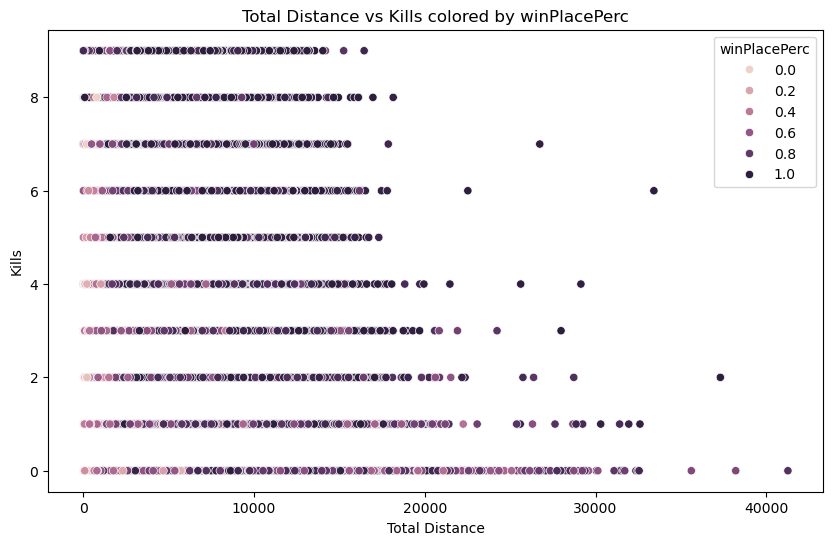

In [20]:
# Create new feature before using it in scatter plot
df['totalDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']

# Now this will work correctly
plt.figure(figsize=(10, 6))
sns.scatterplot(x='totalDistance', y='kills', hue='winPlacePerc', data=df[df['kills'] < 10])
plt.title("Total Distance vs Kills colored by winPlacePerc")
plt.xlabel("Total Distance")
plt.ylabel("Kills")
plt.show() # plotting using matplotlib

# 📊 Exploratory Data Analysis (EDA) Report

This report presents a comprehensive analysis of the PUBG dataset to understand player behavior, identify important features, and explore their relationship with the target variable `winPlacePerc` (the player's final placement in a match). The analysis is divided into **Univariate**, **Bivariate**, and **Multivariate** sections.

---

## 1️⃣ Univariate Analysis

Univariate analysis focuses on understanding the distribution of each variable individually.

### 🔹 Target Variable: `winPlacePerc`
- Nearly **uniform distribution** with spikes at 0 and 1.
- Indicates that many players either win completely or are eliminated early.
- Useful for regression modeling due to its continuous nature.

### 🔹 Kill-related Features
- Variables: `kills`, `killPlace`, `killPoints`, `killStreaks`.
- Most players record **0–3 kills**, while few have high kill counts.
- Kill-related features are **right-skewed**.
- These features are potential indicators of aggressive gameplay and skill.

### 🔹 Distance-related Features
- Variables: `walkDistance`, `rideDistance`, `swimDistance`, and `totalDistance`.
- Majority of players **walk more** than ride or swim.
- `totalDistance` combines all travel and gives a **more complete mobility measure**.
- Outliers exist in all distance features (some players travel exceptionally far).

---

## 2️⃣ Bivariate Analysis

Bivariate analysis investigates the relationship between each feature and the target variable `winPlacePerc`.

### 🔹 Kills vs Win Placement
- **More kills → higher win placement**.
- However, excessive kills don’t guarantee winning.
- Some low-kill players still place high, indicating stealth or survival-focused playstyles.

### 🔹 Heals vs Win Placement
- **Healing correlates positively** with better placement.
- Suggests that strategic healing can improve survival and ranking.

### 🔹 Weapons Acquired vs Win Placement
- Moderate positive correlation.
- Acquiring more weapons may offer tactical advantage, but it's not a guarantee for victory.

---

## 3️⃣ Multivariate Analysis

Multivariate analysis explores the interaction between **multiple variables** simultaneously.

### 🔹 Correlation Heatmap
- Shows the relationship between top numerical features.
- Strong correlation observed between `totalDistance`, `walkDistance`, and `kills` with `winPlacePerc`.
- Detects multicollinearity (important for feature selection).

### 🔹 Match Duration vs winPlacePerc by Team Kills
- Longer matches show more variation in performance.
- Higher team kills don't always result in higher placement.
- May imply a trade-off between aggressive vs strategic playstyles.

### 🔹 Total Distance vs Kills (Colored by winPlacePerc)
- Winning players tend to **move more and get more kills**.
- Visual clustering reveals that high-distance, high-kill players often have a higher `winPlacePerc`.

---

## ✅ Key Insights from EDA

- **Mobility (distance features)** and **combat (kills, weaponsAcquired)** are strong indicators of winning.
- **Healing and match duration** also play significant roles.
- There are outliers in almost all numerical features — handle appropriately during modeling.
- EDA supports the need for **feature engineering** to enhance predictive power.

---



In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['matchType'] = le.fit_transform(df['matchType'])

# View encoding:
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'crashfpp': 0, 'crashtpp': 1, 'duo': 2, 'duo-fpp': 3, 'flarefpp': 4, 'flaretpp': 5, 'normal-duo': 6, 'normal-duo-fpp': 7, 'normal-solo': 8, 'normal-solo-fpp': 9, 'normal-squad': 10, 'normal-squad-fpp': 11, 'solo': 12, 'solo-fpp': 13, 'squad': 14, 'squad-fpp': 15}


In [22]:
# corrlation : identifying highly correlated fetures and removing one of them.
df.corr()  #check corrlation # compute pairwise correlation between features # compute correlations between numerical columns

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance
assists,1.000000,0.307683,0.406726,0.301057,0.198289,0.228556,-0.290062,0.039066,0.319690,0.243471,0.261425,-0.019450,0.031884,-0.147916,-0.146804,-0.016407,0.198320,0.110644,0.011903,0.023372,0.006081,0.057921,0.290306,0.243882,0.024014,0.299441,0.233644
boosts,0.307683,1.000000,0.521947,0.358907,0.334661,0.535854,-0.554844,0.008347,0.502024,0.405327,0.423290,0.072108,0.005295,-0.013686,-0.012929,0.023202,0.253125,0.328855,0.035124,0.107993,0.013068,0.087387,0.640150,0.406609,-0.007644,0.634234,0.574247
damageDealt,0.406726,0.521947,1.000000,0.735763,0.613409,0.342987,-0.677398,0.049904,0.888783,0.703599,0.563837,-0.006755,-0.001138,-0.040707,-0.040078,-0.001460,0.256951,0.140883,0.052487,0.036729,0.015468,0.081182,0.398199,0.353249,0.017762,0.440507,0.313075
DBNOs,0.301057,0.358907,0.735763,1.000000,0.469923,0.265485,-0.555289,0.042616,0.707848,0.646872,0.451422,-0.014485,0.052552,-0.267709,-0.265788,-0.003451,0.300999,0.102537,0.036093,0.017320,0.069430,0.060210,0.284660,0.218161,0.011108,0.279970,0.224934
headshotKills,0.198289,0.334661,0.613409,0.469923,1.000000,0.199918,-0.469829,0.023988,0.674275,0.512882,0.447261,-0.017657,0.000493,0.009211,0.009389,0.005118,0.150145,0.076495,0.013369,0.028531,0.008658,0.039200,0.250982,0.217552,0.004982,0.277722,0.188960
heals,0.228556,0.535854,0.342987,0.265485,0.199918,1.000000,-0.386032,-0.002585,0.311781,0.270412,0.263278,0.108901,0.014982,-0.064759,-0.064204,0.019142,0.236680,0.297484,0.024619,0.079587,0.035386,0.062870,0.430266,0.309071,-0.010990,0.427857,0.438538
killPlace,-0.290062,-0.554844,-0.677398,-0.555289,-0.469829,-0.386032,1.000000,-0.023277,-0.730498,-0.810516,-0.541146,-0.005804,0.005908,0.016792,0.018786,-0.014805,-0.269804,-0.236202,-0.057356,-0.089396,-0.037797,-0.073569,-0.590236,-0.490143,-0.002415,-0.719069,-0.483337
killPoints,0.039066,0.008347,0.049904,0.042616,0.023988,-0.002585,-0.023277,1.000000,0.036192,0.037091,0.014084,-0.099540,0.043876,-0.044802,-0.042366,-0.975555,0.012041,-0.029316,-0.004156,-0.004604,-0.039739,-0.009658,0.004630,-0.003978,0.983417,0.012908,-0.017674
kills,0.319690,0.502024,0.888783,0.707848,0.674275,0.311781,-0.730498,0.036192,1.000000,0.802500,0.602936,-0.030687,-0.005001,-0.004847,-0.004060,0.008199,0.253323,0.114750,0.063651,0.039127,0.017601,0.079991,0.374774,0.336414,0.006929,0.419916,0.282473
killStreaks,0.243471,0.405327,0.703599,0.646872,0.512882,0.270412,-0.810516,0.037091,0.802500,1.000000,0.515097,-0.034644,-0.011519,-0.037338,-0.036054,0.003426,0.241695,0.098420,0.065575,0.034588,0.027612,0.064374,0.327639,0.275373,0.008552,0.377566,0.245650


In [23]:
# Remove matches with rankPoints == -1 (or fill as NaN)
df['rankPoints'] = df['rankPoints'].replace(-1, np.nan)

# Drop rows with matchDuration < 300 sec (optional)
df = df[df['matchDuration'] >= 300]

In [24]:
df

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance
0,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,15,28,26,NaN,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444,244.8000
1,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,15,26,25,1484.0,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400,1445.0445
2,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,2,50,47,1491.0,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755,161.8000
3,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,15,31,30,1408.0,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667,202.7000
4,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,13,97,95,1560.0,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875,49.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,15,29,28,NaN,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786,2311.0000
4446962,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,12,93,93,1501.0,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935,81.7000
4446963,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,15,28,28,1500.0,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815,790.8840
4446964,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,15,26,25,1418.0,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000,2748.0000


In [25]:
missing = df.isnull().sum()
missing = missing[missing > 0]
print("Missing values:\n", missing)

Missing values:
 rankPoints    1701745
dtype: int64


In [26]:
# Option 1: Drop rows
df = df.dropna()

# Option 2: Fill with median or mean
df = df.fillna(df.median(numeric_only=True))

In [27]:
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']
df['healthItems'] = df['heals'] + df['boosts']
df['killEffectiveness'] = df['damageDealt'] / (df['kills'] + 1)

In [28]:
correlation = df.corr(numeric_only=True)['winPlacePerc'].sort_values(ascending=False)
print(correlation)

winPlacePerc         1.000000
walkDistance         0.808061
totalDistance        0.679742
boosts               0.636305
weaponsAcquired      0.586158
healthItems          0.576971
damageDealt          0.441442
heals                0.428676
kills                0.422956
longestKill          0.412601
killStreaks          0.380794
rideDistance         0.355877
assists              0.300307
killEffectiveness    0.298394
headshotKills        0.280425
DBNOs                0.280264
revives              0.239743
swimDistance         0.149159
vehicleDestroys      0.078088
rankPoints           0.053179
numGroups            0.041245
maxPlace             0.038451
roadKills            0.037878
teamKills            0.027862
killPoints           0.001049
winPoints            0.000120
matchDuration       -0.006588
matchType           -0.027255
killPlace           -0.719283
Name: winPlacePerc, dtype: float64


In [29]:
## step 4 : feature scaling
from sklearn.preprocessing import StandardScaler   #importing StandardScaler from preprocessing # import StandardScaler for feature scaling
scaler= StandardScaler() # Define the StandardScaler object # import StandardScaler for feature scaling

In [30]:
# Drop target column for X, keep it in y
X = df.drop(columns=['winPlacePerc'])
y = df['winPlacePerc']

In [31]:
X  = scaler.fit_transform(X) # fit and transform the training data

In [32]:
X

array([[-0.38829155, -0.64753451, -0.22130536, ..., -0.16281686,
        -0.64029336,  0.70193805],
       [ 1.34676194, -0.64753451, -0.35953109, ..., -0.73946391,
        -0.64029336,  0.25267909],
       [-0.38829155, -0.64753451, -0.56625129, ..., -0.72108483,
        -0.64029336, -0.41919946],
       ...,
       [-0.38829155, -0.64753451, -0.4121829 , ..., -0.45677466,
        -0.64029336,  0.08155105],
       [-0.38829155,  1.65700886,  0.30244471, ...,  0.42268765,
         0.88281842,  0.10209662],
       [-0.38829155,  0.50473718,  0.81836179, ...,  0.36202317,
         0.12126253,  0.66103832]])

In [33]:
y

1          0.6400
2          0.7755
3          0.1667
4          0.1875
5          0.0370
            ...  
4446960    0.2414
4446962    0.2935
4446963    0.4815
4446964    0.8000
4446965    0.5464
Name: winPlacePerc, Length: 2745153, dtype: float64

In [34]:
# creating training and testing data
from sklearn.model_selection import train_test_split   #import the train_test_split function from sklearn.model_selection # split the dataset into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)   #Split the dataset into training and testing sets # split the dataset into training and test sets

## test_size=0.25: 25% of the data will be used for testing
## random_state=1 : ensures reproducibility by fixing the seed for 1 number

In [35]:
X_train 

array([[-0.38829155, -0.64753451,  0.04271933, ..., -0.71003041,
         1.89822628,  0.25555036],
       [-0.38829155, -0.64753451, -0.64552348, ...,  0.78438272,
        -0.64029336, -0.67684862],
       [-0.38829155,  1.65700886,  2.25009059, ...,  0.81705166,
         0.3751145 ,  0.58159969],
       ...,
       [-0.38829155, -0.64753451, -0.76001467, ..., -0.53657495,
        -0.64029336, -1.04896597],
       [ 1.34676194,  3.38541639,  2.05573826, ...,  2.00257028,
         4.69059788,  2.00160512],
       [-0.38829155,  0.50473718, -0.76001467, ..., -0.48377439,
        -0.13258943, -1.04896597]])

In [36]:
X_test

array([[-0.38829155, -0.64753451, -0.26618308, ..., -0.79164435,
        -0.64029336,  0.55607724],
       [-0.38829155,  0.50473718,  0.67053624, ...,  0.70070722,
         0.3751145 ,  0.50088493],
       [-0.38829155,  2.2331447 ,  2.35021148, ...,  0.42178891,
         0.88281842,  0.97279507],
       ...,
       [-0.38829155, -0.64753451, -0.68368721, ..., -0.80897731,
        -0.64029336, -0.80088773],
       [-0.38829155, -0.07139867,  0.16522019, ..., -0.53281465,
        -0.13258943,  1.95821695],
       [-0.38829155, -0.64753451, -0.76001467, ..., -0.69048297,
        -0.64029336, -1.04896597]])

In [37]:
y_train

538820     0.4043
3269128    0.3404
744052     0.8947
11367      0.2222
3358760    0.5185
            ...  
178906     0.4839
2742666    0.8077
3817584    0.5357
3611515    0.8571
3595309    0.4792
Name: winPlacePerc, Length: 2058864, dtype: float64

In [38]:
y_test

2648037    0.0000
2158932    0.8958
1631561    0.9630
2965051    0.6786
3616733    0.3929
            ...  
634251     0.2500
3546716    0.6400
2663252    0.0222
3793848    0.6667
2077893    0.4111
Name: winPlacePerc, Length: 686289, dtype: float64

In [39]:
# Importing regression models
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [40]:
# Other imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
    median_absolute_error,
    explained_variance_score
)

In [41]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=20, n_jobs=-1, max_depth=5, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=20, max_depth=3, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=20),
    "Extra Trees": ExtraTreesRegressor(n_estimators=20, n_jobs=-1, max_depth=5, random_state=42),
    
    # Models that need scaling — wrapped in a pipeline
    "SGD Regressor": Pipeline([
        ("scaler", StandardScaler()),
        ("sgd", SGDRegressor(max_iter=1000, tol=1e-3, random_state=42))
    ]),
        
    "MLP Regressor": Pipeline([
        ("scaler", StandardScaler()),
        ("mlp", MLPRegressor(hidden_layer_sizes=(50,), max_iter=300, early_stopping=True, random_state=42))
    ])
} 

In [42]:
model_list = []
r2_score_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]

    print(f"Training model: {model_name}")
    try:

        
        model.fit(X_train, y_train)  # Full training (may take time for complex models)

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Evaluate on Training Set
        model_train_r2 = r2_score(y_train, y_train_pred)
        model_train_mae = mean_absolute_error(y_train, y_train_pred)
        model_train_mse = mean_squared_error(y_train, y_train_pred)

        # Evaluate on Test Set
        model_test_r2 = r2_score(y_test, y_test_pred)
        model_test_mae = mean_absolute_error(y_test, y_test_pred)
        model_test_mse = mean_squared_error(y_test, y_test_pred)

        # Store results
        model_list.append(model_name)
        r2_score_list.append(model_test_r2)

        # Print performance summary
        print(model_name)
        print('Model Performance on Training Set')
        print("- R² Score: {:.4f}".format(model_train_r2))
        print("- MAE: {:.4f}".format(model_train_mae))
        print("- MSE: {:.4f}".format(model_train_mse))
        print('----------------------------------')

        print('Model Performance on Test Set')
        print("- R² Score: {:.4f}".format(model_test_r2))
        print("- MAE: {:.4f}".format(model_test_mae))
        print("- MSE: {:.4f}".format(model_test_mse))
        print('=' * 35)
        print('\n')

    except Exception as e:
        print(f"⚠️ Skipping model '{model_name}' due to error: {e}")
        print('=' * 35)

Training model: Linear Regression
Linear Regression
Model Performance on Training Set
- R² Score: 0.8316
- MAE: 0.0921
- MSE: 0.0159
----------------------------------
Model Performance on Test Set
- R² Score: 0.8320
- MAE: 0.0919
- MSE: 0.0159


Training model: Decision Tree
Decision Tree
Model Performance on Training Set
- R² Score: 0.9999
- MAE: 0.0000
- MSE: 0.0000
----------------------------------
Model Performance on Test Set
- R² Score: 0.8549
- MAE: 0.0814
- MSE: 0.0137


Training model: Random Forest
Random Forest
Model Performance on Training Set
- R² Score: 0.8448
- MAE: 0.0867
- MSE: 0.0147
----------------------------------
Model Performance on Test Set
- R² Score: 0.8456
- MAE: 0.0864
- MSE: 0.0146


Training model: Gradient Boosting
Gradient Boosting
Model Performance on Training Set
- R² Score: 0.8305
- MAE: 0.0958
- MSE: 0.0160
----------------------------------
Model Performance on Test Set
- R² Score: 0.8311
- MAE: 0.0956
- MSE: 0.0160


Training model: AdaBoost
Ada

In [43]:
def evaluate_regression_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, mae, rmse

In [44]:
score = pd.DataFrame(list(zip(model_list, r2_score_list)), columns=['Model Name', 'r2_score']).sort_values(by=["r2_score"],ascending=False) # evaluation metrics for Regression model

In [45]:
score

,Model Name,r2_score
7,MLP Regressor,0.926934
1,Decision Tree,0.854904
2,Random Forest,0.845556
5,Extra Trees,0.833090
0,Linear Regression,0.832013
6,SGD Regressor,0.831729
3,Gradient Boosting,0.831127
4,AdaBoost,0.827189


In [46]:
score.r2_score = score.r2_score*100

In [47]:
score

,Model Name,r2_score
7,MLP Regressor,92.693423
1,Decision Tree,85.490437
2,Random Forest,84.555565
5,Extra Trees,83.308955
0,Linear Regression,83.201307
6,SGD Regressor,83.172875
3,Gradient Boosting,83.112704
4,AdaBoost,82.718856


In [48]:
best_row = score.loc[score['r2_score'].idxmax()]
# Extract model name
best_model_name = best_row['Model Name']
print(f"Best model: {best_model_name}")

# Get the corresponding trained model from your models dictionary
best_model = models[best_model_name]

Best model: MLP Regressor


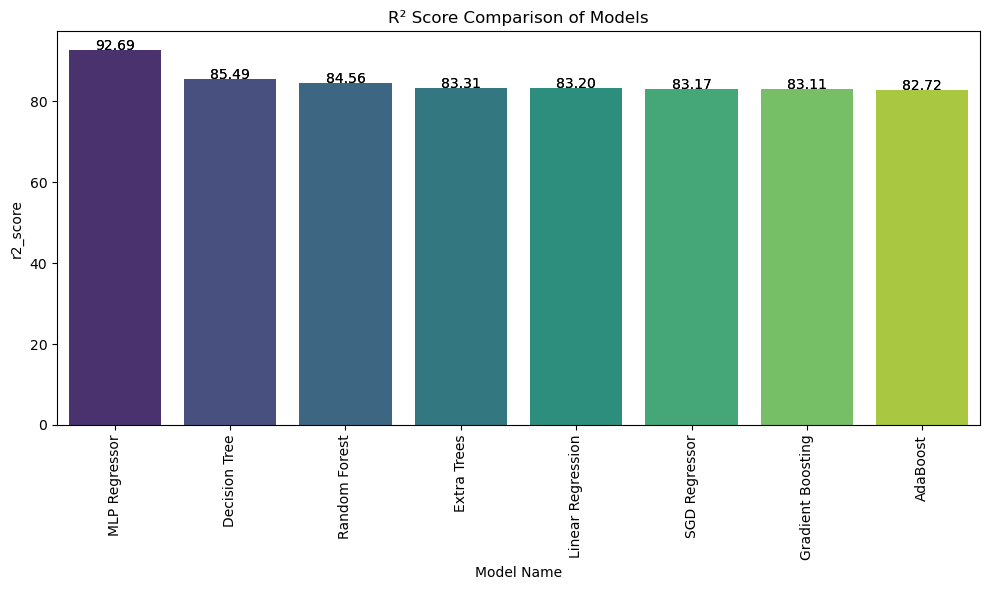

In [49]:
plt.figure(figsize=(10, 6)) # plotting using matplotlib
num = 0
for i in score :
    if num <= 7:
        a = sns.barplot(x='Model Name', y='r2_score', data=score,palette='viridis')
        plt.title('R² Score Comparison of Models') # plotting using matplotlib
        plt.xlabel('Model Name') # plotting using matplotlib
        plt.ylabel('r2_score') # plotting using matplotlib
        # plt.ylim(0, 1.1) # plotting using matplotlib
        plt.xticks(rotation=90) # plotting using matplotlib
        
        for index,value in enumerate(score['r2_score']):
            a.text(index,value + 0.02 , f'{value:.2f}',ha='center')

        num += 1

plt.tight_layout() # plotting using matplotlib
plt.show() # plotting using matplotlib

In [50]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor  # Corrected: for regression tasks
from sklearn.metrics import make_scorer

In [51]:
# Use safe scoring function
scoring = make_scorer(r2_score)

# Create model and param grid
tree_reg = DecisionTreeRegressor(random_state=42)
params = {
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
}

# Serial GridSearchCV (n_jobs=1 avoids pickling and temp file errors)
tree_cv = GridSearchCV(tree_reg, params, scoring=scoring, n_jobs=1, verbose=3, cv=3)
tree_cv.fit(X_train, y_train)

# Best parameters
print(tree_cv.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ..max_depth=5, min_samples_split=2;, score=0.841 total time=  21.5s
[CV 2/3] END ..max_depth=5, min_samples_split=2;, score=0.842 total time=  21.5s
[CV 3/3] END ..max_depth=5, min_samples_split=2;, score=0.842 total time=  21.2s
[CV 1/3] END ..max_depth=5, min_samples_split=5;, score=0.841 total time=  21.4s
[CV 2/3] END ..max_depth=5, min_samples_split=5;, score=0.842 total time=  21.5s
[CV 3/3] END ..max_depth=5, min_samples_split=5;, score=0.842 total time=  22.7s
[CV 1/3] END .max_depth=5, min_samples_split=10;, score=0.841 total time=  22.6s
[CV 2/3] END .max_depth=5, min_samples_split=10;, score=0.842 total time=  22.5s
[CV 3/3] END .max_depth=5, min_samples_split=10;, score=0.842 total time=  22.5s
[CV 1/3] END .max_depth=10, min_samples_split=2;, score=0.898 total time=  42.8s
[CV 2/3] END .max_depth=10, min_samples_split=2;, score=0.900 total time=  43.0s
[CV 3/3] END .max_depth=10, min_samples_split=2;,

In [52]:
tree_cv.best_params_ 

{'max_depth': 15, 'min_samples_split': 10}

In [53]:
# passing best parameter to decision tree
dt=DecisionTreeRegressor(max_depth=15,min_samples_split=10)

In [54]:
dt.fit(X_train,y_train) # train the model with training data

DecisionTreeRegressor(max_depth=15, min_samples_split=10)

In [55]:
y_hap1 = dt.predict(X_test) # make predictions on the test set
y_hapar1 = dt.predict(X_train) # make predictions on the test set

In [56]:
A1=r2_score(y_test,y_hap1)      # evaluation metrics for Regression model
A1                

0.9180653222487465

In [57]:
a1=r2_score(y_train,y_hapar1)     # evaluation metrics for Regression model
a1                       

0.92844364378979

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define a smaller, faster hyperparameter grid
n_estimators = [50, 100, 200]                            # Fewer trees = faster
max_features = ['sqrt', 'log2']                          # Fast, effective strategies
max_depth = [10, 20]                               # Limit depth or allow full
min_samples_split = [2, 5]                               # Avoid over-splitting
min_samples_leaf = [1, 2]                                # Minimum samples per leaf

# Hyperparameter dictionary
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# Instantiate model
rf_reg = RandomForestRegressor(random_state=42, n_jobs=-1)

# Use RandomizedSearchCV for faster tuning
rf_cv = RandomizedSearchCV(
    estimator=rf_reg,
    param_distributions=random_grid,
    n_iter=10,                  # Try only 10 random combinations
    scoring='r2',
    cv=3,                       # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=1                   # Use all CPU cores
)

# Fit model
rf_cv.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", rf_cv.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 1.9min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 1.9min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 1.8min
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 3.5min
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 3.5min
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 3.4min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 6.7min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; t

In [59]:
rf_cv.best_params_ 

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [60]:
# passing best parameter to decision tree
dt1=RandomForestRegressor(n_estimators= 200, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth=20)

In [61]:
dt1.fit(X_train,y_train) # train the model with training data

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200)

In [62]:
y_hap2 = dt1.predict(X_test) # make predictions on the test set
y_hapar2 = dt1.predict(X_train) # make predictions on the test set

In [63]:
A2=r2_score(y_test,y_hap2)      # evaluation metrics for Regression model
A2                

0.9220374853883461

In [64]:
a2=r2_score(y_train,y_hapar2)     # evaluation metrics for Regression model
a2                       

0.9507838082258011

In [65]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, r2_score

# Create pipeline: always scale for SGD!
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(random_state=42, max_iter=1000, tol=1e-3))
])

# Define hyperparameter space
param_dist = {
    "sgd__alpha": [0.0001, 0.001, 0.01],
    "sgd__penalty": ["l2", "l1", "elasticnet"],
    "sgd__loss": ["squared_error", "huber", "epsilon_insensitive"],
    "sgd__learning_rate": ["constant", "optimal", "invscaling", "adaptive"],
    "sgd__eta0": [0.01, 0.001, 0.0001]
}

# Set up RandomizedSearchCV
sgd_cv = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=10,
    scoring=make_scorer(r2_score),
    cv=3,
    verbose=3,
    n_jobs=1,
    random_state=42
)

# Fit on full data (yes, it handles millions of rows)
sgd_cv.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", sgd_cv.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END sgd__alpha=0.001, sgd__eta0=0.01, sgd__learning_rate=invscaling, sgd__loss=epsilon_insensitive, sgd__penalty=l2;, score=0.826 total time=   6.3s
[CV 2/3] END sgd__alpha=0.001, sgd__eta0=0.01, sgd__learning_rate=invscaling, sgd__loss=epsilon_insensitive, sgd__penalty=l2;, score=0.824 total time=   5.6s
[CV 3/3] END sgd__alpha=0.001, sgd__eta0=0.01, sgd__learning_rate=invscaling, sgd__loss=epsilon_insensitive, sgd__penalty=l2;, score=0.829 total time=   5.5s
[CV 1/3] END sgd__alpha=0.001, sgd__eta0=0.01, sgd__learning_rate=constant, sgd__loss=squared_error, sgd__penalty=l2;, score=-114884503292711960576.000 total time=   6.4s
[CV 2/3] END sgd__alpha=0.001, sgd__eta0=0.01, sgd__learning_rate=constant, sgd__loss=squared_error, sgd__penalty=l2;, score=-868545980579468416.000 total time=   5.3s
[CV 3/3] END sgd__alpha=0.001, sgd__eta0=0.01, sgd__learning_rate=constant, sgd__loss=squared_error, sgd__penalty=l2;, score=-

In [66]:
sgd_cv.best_params_

{'sgd__penalty': 'l2',
 'sgd__loss': 'squared_error',
 'sgd__learning_rate': 'constant',
 'sgd__eta0': 0.0001,
 'sgd__alpha': 0.001}

In [67]:
dt2 = SGDRegressor(penalty= 'l2', loss= 'squared_error', learning_rate='invscaling', eta0=0.01, alpha=0.001)

In [68]:
dt2.fit(X_train,y_train) # train the model with training data

SGDRegressor(alpha=0.001)

In [69]:
y_hap2 = dt2.predict(X_test) # make predictions on the test set
y_hapar2 = dt2.predict(X_train) # make predictions on the test set

In [70]:
A3=r2_score(y_test,y_hap2)      # evaluation metrics for Regression model
A3                

0.8310264961300178

In [71]:
a3=r2_score(y_train,y_hapar2)     # evaluation metrics for Regression model
a3                       

0.8305472712178189

In [72]:
from sklearn.neural_network import MLPRegressor

# Pipeline and Parameter Grid
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(max_iter=500, random_state=42))
])

param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__solver': ['adam'],
    'mlp__alpha': [0.0001, 0.001],
    'mlp__learning_rate': ['constant', 'adaptive'],
}

#  Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', verbose=2, n_jobs=1)
grid_search.fit(X_train, y_train)

# Evaluation
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__learning_rate=constant, mlp__solver=adam; total time= 1.4min
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__learning_rate=constant, mlp__solver=adam; total time= 1.5min
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__learning_rate=constant, mlp__solver=adam; total time= 1.6min
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__learning_rate=adaptive, mlp__solver=adam; total time= 1.5min
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__learning_rate=adaptive, mlp__solver=adam; total time= 2.2min
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__learning_rate=adaptive, mlp__solver=adam; total time= 2.5min
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hi

In [73]:
grid_search.best_params_

{'mlp__activation': 'relu',
 'mlp__alpha': 0.0001,
 'mlp__hidden_layer_sizes': (100, 50),
 'mlp__learning_rate': 'constant',
 'mlp__solver': 'adam'}

In [75]:
dt3 = MLPRegressor(activation='relu', alpha=0.0001, hidden_layer_sizes= (100, 50), learning_rate='constant', solver= 'adam')

In [77]:
dt3.fit(X_train,y_train) # train the model with training data

MLPRegressor(hidden_layer_sizes=(100, 50))

In [78]:
y_hap3 = dt3.predict(X_test) # make predictions on the test set
y_hapar = dt3.predict(X_train) # make predictions on the test set

In [79]:
A4=r2_score(y_test,y_hap3)      # evaluation metrics for Regression model
A4                

0.930958570357756

In [81]:
a4=r2_score(y_train,y_hapar)     # evaluation metrics for Regression model
a4                       

0.9311425797517311

In [83]:
import pickle                             #Importing the pickle module
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)                      #save it to the file

In [84]:
with open("best_model.pkl","rb") as f:   #Open the file "best_model.pkl" in read-binary mode
  model=pickle.load(f)   

In [85]:
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500,
                              random_state=42))])

#  Model Evaluation Report

##  Algorithms Used:
A total of **machine learning algorithms** were applied and evaluated on the dataset:

- Linear Regression
- SGD Regression 
- Decision Tree Classifier  
- Random Forest Classifier  
- Gradient Boosting Classifier
- MLP Classifier (Neural Network)  
- AdaBoost Classifier  
- Extra Trees Classifier  

---

## Best Performing Models:
The following models showed the **highest accuracy**, indicating superior classification performance:

- **MLPRegressor** (Neural Network): **92%**
- **Decision Tree**: **85%**

---

## Moderate Performance Models:
These models achieved **good but slightly lower accuracy**, ranging between **81% and 88%**:

- Decision Tree Classifier  
- Random Forest Classifier  
- Gradient Boosting Classifier  

These models demonstrate **moderate performance**, still suitable for deployment with tuning or ensembling.

---

## Summary:
- Simple models like **Linear Regression**  also performed competitively.
- Ensemble techniques like **Random Forest** and **Gradient Boosting** showed consistent and reliable results.
- Neural network-based **MLPClassifier** showed excellent potential after tuning.

---

## Conclusion:
Model performance varies based on complexity, data scaling, and hyperparameters. **MLPRegressor** are top choices for accuracy, while **ensemble methods** offer robustness and stability. Further tuning or model stacking may yield even better results.


## Final Challenges of Report 

* **Missing Data**: Some features like `winPlacePerc` and other player stats may have missing or null values, which must be handled through imputation or removal to avoid biasing the model.

* **Feature Scaling**: Distance-sensitive models (MLP) require normalization of features like `walkDistance`, `damageDealt`, and `rideDistance`, which can vary drastically in scale.

* **Feature Redundancy**: Some features may be highly correlated (e.g., `walkDistance`, `moveDistance`, `totalDistance`) and can lead to multicollinearity or overfitting if not managed.

* **Feature Importance & Interaction**: Exploring which features impact placement most (like kills, survival time, or team size) and how they interact can significantly improve model performance.

* **Class Imbalance**: Depending on how the data is framed (e.g., binary win/lose), imbalance in outcomes can lead to biased models that favor the majority class.

* **Match Type Variance**: Different match types (solo, duo, squad) influence player behavior, and combining them without proper labeling can reduce model accuracy.

##  Suggestions for Improving PUBG Placement Prediction

* Match-Type Segmentation: Separate models for solo, duo, and squad matches can improve prediction accuracy by capturing game mode-specific strategies and behaviors.

* Team-Level Features: Incorporating aggregated team-level statistics (e.g., average kills, distance) can enhance prediction for squad-based matches.

* Real-Time Prediction: Implementing the model in real-time during matches could help players make tactical decisions based on current performance trends.

* Feature Selection & Importance: Use model interpretation tools like SHAP to identify key features influencing final placement and optimize gameplay accordingly.

* Continuous Model Training: Updating models with new match data regularly ensures adaptability to evolving game dynamics and strategies.
